<i>Non-linear dynamics</i> is broadly the study of systems whose behaviour is described by complicated non-linear functions. Since most of the world is non-linear, this is a very useful field of mathematics for biology. In this notebook, we will see how graphical methods can be used to study non-linear systems of equations. Those interested in details can refer to Strogatz's [excellent book](https://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering) for details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *

## One dimensional systems

One-dimensional systems are equations of the form
<br>
$$
\dot{x} = f(x)
$$
<br>
where $\dot{x}$ denotes the derivative of $x$ with respect to time and $f$ is a (non-linear) function. For instance, the logistic equation

$$
\dot{x} = x(1-x)
$$

is an example of a one-dimensional non-linear system. Let us see how we may study this system. 

In [2]:
def logistic(x,t):
    return x*(1-x)

### Finding fixed points diagrammatically

Often, we are only interesed in the behavior of our biological system at equilibrium (or over very long timescales). In this case, we are interested in finding points at which $\dot{x} = 0$ (the quantity $x$ is no longer changing). Such points are called _fixed points_ of the system.  To find fixed points of a one-dimensional system, we can plot $\dot{x}$ vs $x$. The points at which this curve intersects the x-axis are then the fixed points of our system.

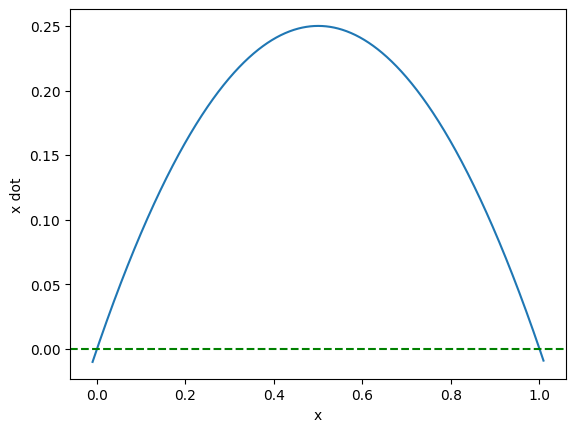

In [3]:
xarray = np.arange(-0.01,1.01,0.001)
xdotarray = [logistic(x,0) for x in xarray]
plt.plot(xarray,xdotarray)
plt.axhline(y=0,color='g',linestyle='--')
plt.xlabel('x')
plt.ylabel('x dot')
plt.show()

Thus, we see that the only fixed points of this system are $x=0$ and $x=1$.

We can also ask which fixed points of the system are <i>attractors</i>. If we begin at, say, $x=0.01$, will the system move towards $x=0$ or $x=1$? This too can be answered diagramatically. Notice, in the plot above, that $\dot{x}$ is positive when $x \in [0,1]$. Thus, if $x$ is between $0$ and $1$, it will <i>increase</i> (since the rate of change is positive) towards $x = 1$. However, if $x>1$, then  $\dot{x}$ is negative, meaning that $x$ tends to decrease. This means that systems with $x>1$ tend to decrease towards $x=1$ - the point $x=1$ is an attractor!

We can confirm this by numerically integrating the logistic equation for a variety of initial conditions

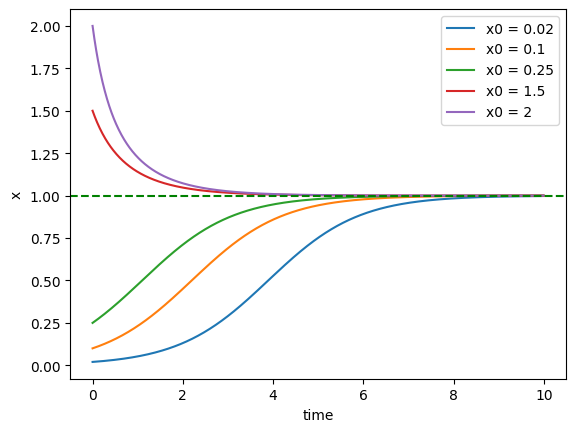

In [4]:
def logistic_trajectory(x0list,t=10,tstep=0.01):
    for x0 in x0list:
        xlist = np.arange(0,t,tstep)
        ylist = odeint(func=logistic,y0=[x0],t=np.arange(0,t,tstep))
        plt.plot(xlist,ylist,label='x0 = '+str(x0))
    
    plt.legend(loc='upper right')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.axhline(y=1,color='g',linestyle='--')
    plt.show()

logistic_trajectory([0.02,0.1,0.25,1.5,2])

### A more complicated example with a single tunable parameter

Consider now the more complicated system

$$
\dot{x} = rx - x^3
$$

where $r$ is a model parameter.

In [5]:
def xdot(x,t,r):
    return r*x - x**3

### The fixed points

To begin, let us study the fixed points of the system. As before, we do it graphically

In [6]:
def xdot_vs_x(rlist):
    for r in np.arange(rlist[0],rlist[1],rlist[2]):
        x = np.arange(-10,10,0.01)
        xdotlist = []
        for val in x:
            xdotlist.append(xdot(val,0,r))
        
        plt.plot(x,xdotlist,label='r = '+str(r))
    plt.axhline(y=0,color='g',linestyle='--')
    plt.axvline(x=0,color='g',linestyle='--')
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('x dot')
    plt.xlim([-5,5])
    plt.ylim([-10,10])
    plt.show()

In [7]:
xdot_vs_x([-6,6.1,6])

The number of fixed points changes depending on the parameter!

In [8]:
from celluloid import Camera

rlist = np.arange(-10,10,0.1)
fig = plt.figure(figsize = (8,8))
plt.ylim(-0.1,1.1)
plt.xlabel("x")
plt.ylabel("x dot")
camera = Camera(fig)
for r in rlist:
    xlist = np.arange(-10,10,0.1)
    ylist = [xdot(x,0,r) for x in xlist]
    plt.plot(xlist,ylist,color='r')
    plt.axhline(y=0,color='g',linestyle='--')
    plt.axvline(x=0,color='g',linestyle='--')
    plt.legend(['$r = '+str(np.round(r,1))+'$'],loc='upper right')
    plt.xlabel('x')
    plt.ylabel('x dot')
    plt.xlim([-5,5])
    plt.ylim([-10,10])
    camera.snap()
plt.close()

You can play around with it here:

In [9]:
plt.rcParams["animation.html"] = "jshtml"
animation = camera.animate()
animation

### Solving the ODE


#### Obtaining an analytic solution

This can also be seen by actually solving the differential equation. I will use sympy to analytically solve the differential equation

In [10]:
#Solving the given ODE symbolically
n,r = symbols('n r')
init_printing()
n_dot = r*n - n**3

solve(n_dot,n)

#### Numeric integration to find trajectories

Since solving ODEs analytically is not always feasible, we could also use numerical integration to obtain the *trajectory*, i.e the values of $x(t)$ as $t$ varies, given an initial value $x_0$. Here, I use the *odeint* package from scipy.

In [11]:
def trajectory(rlist,x0,t=10,tstep=0.01):
    xlist = np.arange(0,t,tstep)
    for r in rlist:
        ylist = odeint(func=xdot,y0=[x0],t=np.arange(0,t,tstep),args=tuple([r]))
        plt.plot(xlist,ylist,label='r = '+str(r))
    
    plt.legend(loc='upper right')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.show()

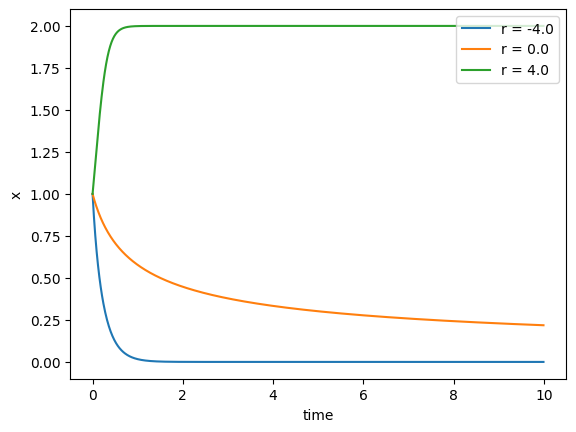

In [12]:
trajectory(np.arange(-4,4.1,4),1)

### Dependence on parameters

Finally, we can examine how the number of fixed points varies as we vary parameters. In our case, the system has a single parameter: $r$. <br>
<br>
We examine the relationship between fixed points and parameter values by plotting a *bifurcation diagram*. In this case, we plot $r$ against the corresponding equilibrium values of $x$, for various initial values $x(0)$.

In [13]:
def bifurcation(r_range):
    rvals = np.arange(r_range[0],r_range[1],r_range[2])
    eq_list = []
    r_list = []
    for r in rvals:
        for x in np.arange(-10,10.1,5):
            unique_sols = np.unique(odeint(func=xdot,y0=[x],t=np.arange(0,1000,1),args=tuple([r]))[900:1000])
            for sol in unique_sols:
                eq_list.append(sol)
                r_list.append(r)
    
    plt.scatter(r_list,eq_list,color='g',s=2)
    plt.xlabel('r')
    plt.ylabel('x*')
    plt.show()
        

In [14]:
bifurcation([-4,4.1,0.1])

This diagram tells us that when r is less than 0, there is a single fixed point present at x = 0. At r = 0, the behaviour changes, and two new fixed points appear for all values of r > 0. Values of $r$ at which such changes occur are known as *bifurcation points*.

## Two dimensional systems

Two dimensional systems are systems of the form:

$$
\begin{align*}
\dot{x} = f(x,y) \\
\dot{y} = g(x,y)
\end{align*}
$$
<br>

As before, we can begin by plotting the phase portrait. Here, the phase portrait is two-dimensional, and you can think of $f(x,y)$ and $g(x,y)$ as representing the flow on a plane.

In [15]:
def twoD_phase_portrait(var,var_dot,xlims=[-10,10,40],ylims=[-10,10,40],plot_nullclines=True,save=False,filename='2D_portrait.png'):    
    
    #convert the symbolic math into a python function
    dvar = lambdify(var,var_dot,'numpy')
    
    #The range of values in which you want the phase portrait
    x_in = np.linspace(xlims[0],xlims[1],xlims[2])
    y_in = np.linspace(ylims[0],ylims[1],ylims[2])
        
    X_in, Y_in = np.meshgrid(x_in,y_in)
    
    #Compute and store the derivatives at each point
    u,v = np.zeros(X_in.shape), np.zeros(Y_in.shape)
    shape_1, shape_2 = X_in.shape
    for i in range(shape_1):
        for j in range(shape_2):
            pt_x = X_in[i,j]
            pt_y = Y_in[i,j]
            derivative = dvar(pt_x,pt_y)
            u[i,j] = derivative[0]
            v[i,j] = derivative[1]
    
    colors = np.hypot(u,v)
    colors[colors==0] = 1 #To avoid division by 0
    
    #Normalize arrow lengths
    #u /= colors
    #v /= colors
    
    
    plt.figure(figsize=(8,8))
    plt.quiver(X_in,Y_in,u,v,colors,cmap='Reds',pivot='mid')
    
    if plot_nullclines:
        #Compute and plot the nullclines
        x_nullcline = solve(var_dot[0])
        y_nullcline = solve(var_dot[1])
    
        xnull_label = "x nullcline"
        for sol in range(len(x_nullcline)):
            try:
                null_func = lambdify(var[1],x_nullcline[sol][x],'numpy')
                null = []
                for i in range(len(y_in)):
                    null.append(null_func(y_in[i]))
                plt.plot(null,y_in,'b',label=xnull_label)
                xnull_label = '_nolegend_' #To avoid duplicate labels
            except KeyError:
                null_func = lambdify(var[0],y_nullcline[sol][y],'numpy')
                null = []
                for i in range(len(x_in)):
                    null.append(null_func(x_in[i]))
                plt.plot(x_in,null,'b',label=xnull_label)
                xnull_label = '_nolegend_' #To avoid duplicate labels
    
        ynull_label = 'y nullcline'
        for sol in range(len(y_nullcline)):
            try:
                null_func = lambdify(var[1],y_nullcline[sol][x],'numpy')
                null = []
                for i in range(len(y_in)):
                    null.append(null_func(y_in[i]))
                plt.plot(null,y_in,'r',label=ynull_label)
                ynull_label = '_nolegend_' #To avoid duplicate labels
            except KeyError:
                null_func = lambdify(var[0],y_nullcline[sol][y],'numpy')
                null = []
                for i in range(len(x_in)):
                    null.append(null_func(x_in[i]))
                plt.plot(x_in,null,'r',label=ynull_label)
                ynull_label = '_nolegend_' #To avoid duplicate labels
    
    plt.xlabel(str(var[0]))
    plt.ylabel(str(var[1]))
    plt.xlim(xlims[0:2])
    plt.ylim(ylims[0:2])
    plt.colorbar(label="Derivative")
    
    if plot_nullclines:
        plt.legend(bbox_to_anchor=[1.3,1])
    if save:
        plt.savefig(filename)
    

In [16]:
x,y = symbols('x y')

init_printing()

In [17]:
#write the differential equations here
x_dot, y_dot = cos(x-y), sin(x*y+1)

x_dot, y_dot

In [18]:
twoD_phase_portrait([x,y],[x_dot,y_dot],xlims=[-10,10,50],ylims=[-10,10,50],plot_nullclines=False)

### Nullclines

One useful notion is that of a *nullcline*. Nullclines are defined as the curves where either $\dot{x} = 0$ or $\dot{y} = 0$. Fixed points are points at which nullclines intersect.

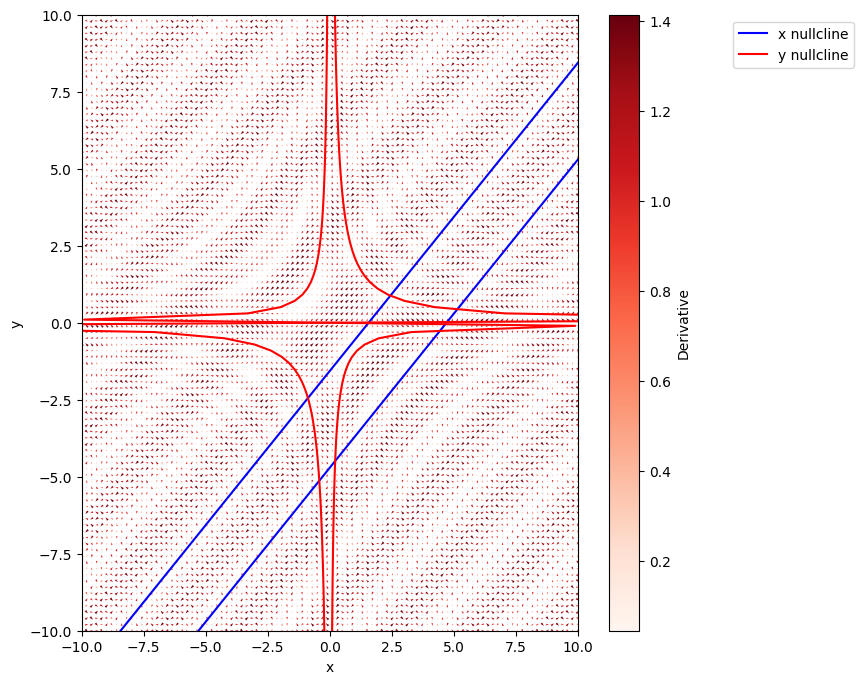

In [19]:
twoD_phase_portrait([x,y],[x_dot,y_dot],xlims=[-10,10,100],ylims=[-10,10,100])

In [20]:
#Number of fixed points should equal the number of times the nullclines intersect
fixed_points = solve([x_dot,y_dot],[x,y])
len(fixed_points)